## library and dataset

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support,precision_score

## load data

In [2]:
datasource = 'https://raw.githubusercontent.com/seongohr/ML/master/column_2C.dat'
df = pd.read_csv(datasource,sep=' ', names=
                   ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius'
                    ,'degree_spondylolisthesis','class'])
#print(df.head())
#print (df.dtypes)

## (b)-i. Make scatterplots

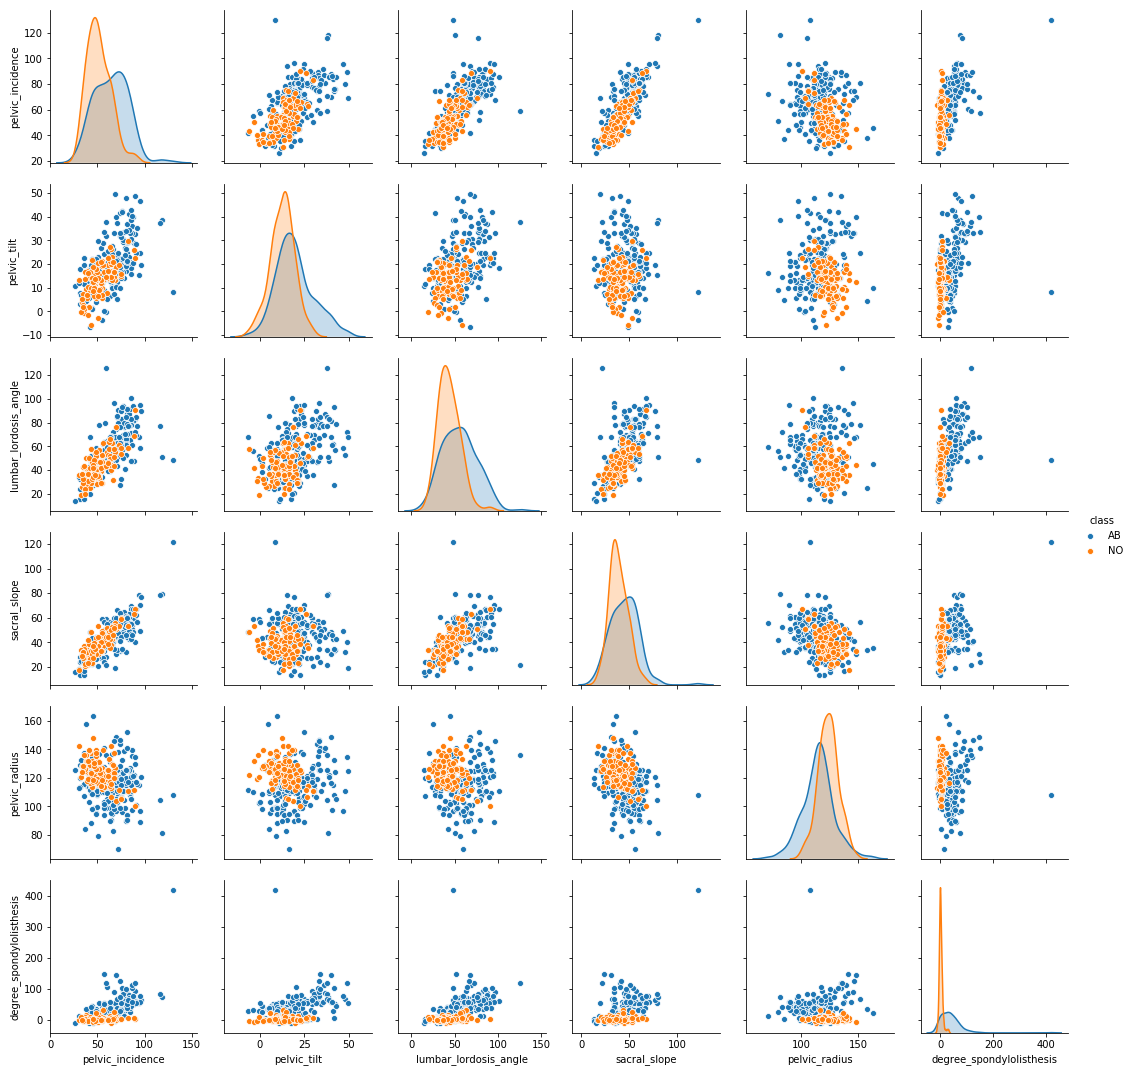

In [3]:
scPlot = sns.pairplot(df, hue="class")
plt.show()

## (b)-ii. Make boxplots


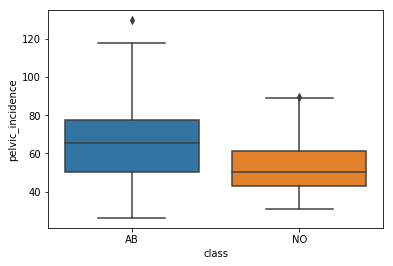

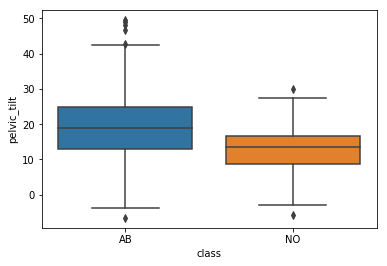

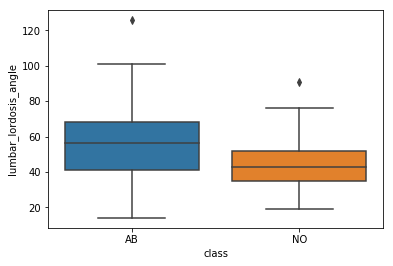

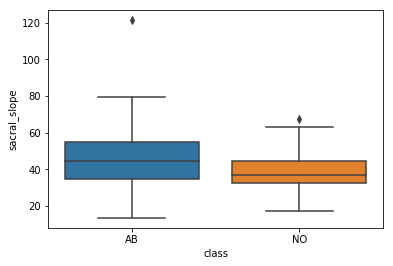

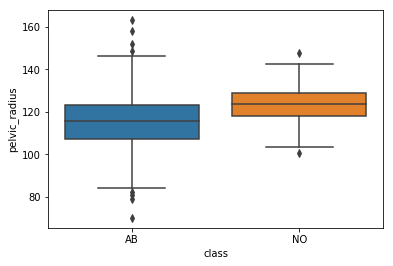

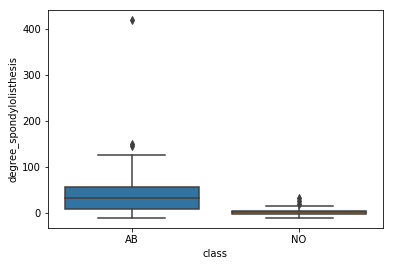

In [4]:
for i in range(len(df.columns) - 1):
    col = df.columns[i]
    bPlot = sns.boxplot(x = 'class', y = col, data = df)
    plt.show()

### String data(class) to numerical data : Ab=1, no = 0

In [5]:
df["class"].value_counts()
cleanup_nums = {"class":{"AB": 1, "NO": 0}}
df.replace(cleanup_nums, inplace=True)

## (b)-iii. split data as train data and test data
    training set : the first 70 rows of class 0(Normal), the first 140 rows of class 1(Abnormal)

In [6]:
y = df['class']
x = df.drop('class', axis=1)

x_train = pd.concat([x.loc[:139,:], x.loc[210:279,:]])
x_test = pd.concat([x.loc[140:209,:], x.loc[280:,:]])
y_train = pd.concat([y.loc[:139,], y.loc[210:279,]])
y_test = pd.concat([y.loc[140:209,], y.loc[280:,]])

## (c)-i. Write code for k-nearest neighbors with Euclidean metric
##     -ii. Test all the data in the test database with k nearest neighbors.

In [7]:
k_values = []
testErrors = []
trainErrors = []
num_k = 208
best_test_k = num_k
best_train_k = num_k
minTestError = math.inf
minTrainError = math.inf
#temp=[]
bestConfusionMatrix=[]
global precision
global fbetascore

while (num_k > 0):
    k_values.append(num_k)
    # create object of the classifier
    neigh = KNeighborsClassifier(n_neighbors=num_k)
    #train the algorithm
    neigh.fit(x_train, y_train)
    #predict the response
    pred_test = neigh.predict(x_test)
    pred_train = neigh.predict(x_train)
    test_error = np.mean(y_test != pred_test)
    train_error = np.mean(y_train != pred_train)
    testErrors.append(test_error)
    trainErrors.append(train_error)
    
    
    if minTestError > test_error:
        minTestError = test_error
        best_test_k = num_k
        bestConfusionMatrix = confusion_matrix(y_test, pred_test)
        bestPrecision, bestRecall, bestFbetascore, bestSupport  = precision_recall_fscore_support(y_test, pred_test, average='binary')
        
    if minTrainError > train_error:
        minTrainError = train_error
        best_train_k = num_k
    
    #temp.append((num_k, test_error, train_error, confusion_matrix(y_test, pred_test), precision, fbetascore))
    num_k = num_k - 3
print("best test k : ", best_test_k, ", best train k: ",best_train_k)

best test k :  4 , best train k:  1


### plot the test error and train error with in terms of k

Text(0, 0.5, 'Error')

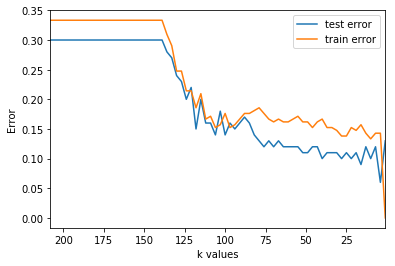

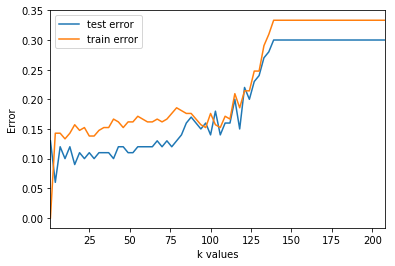

In [8]:
resultDf = pd.DataFrame({'test error': testErrors, 'train error': trainErrors}, index = k_values)
errorsLineInverseX = resultDf.plot.line().invert_xaxis()
plt.xlabel('k values')
plt.ylabel('Error')
errorsLine = resultDf.plot.line()
plt.xlabel('k values')
plt.ylabel('Error')
#plt.show()

### calculate confusion matrix, true positive, true negative, precision, f score

In [9]:
#confusion matrix
TN = bestConfusionMatrix[0][0]
FP = bestConfusionMatrix[0][1]
FN = bestConfusionMatrix[1][0]
TP = bestConfusionMatrix[1][1]

print("confusion matrix : \n", bestConfusionMatrix,"\n")
print("True Positive Rate: ", TP/(TP+FN),"\n")
print("True Negative Rate : ", TN/(TN+FP),"\n")
print ("precision : ",bestPrecision,"\n")
print ("f score : ", bestFbetascore)

confusion matrix : 
 [[25  5]
 [ 1 69]] 

True Positive Rate:  0.9857142857142858 

True Negative Rate :  0.8333333333333334 

precision :  0.9324324324324325 

f score :  0.9583333333333333


## (c)-iii. Plot the best test error rate obtained by some value of k, against the size of training set.

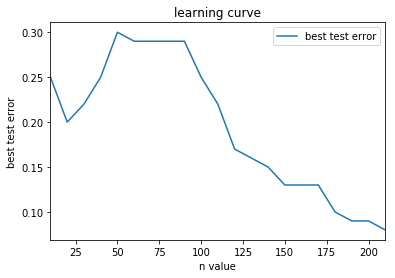

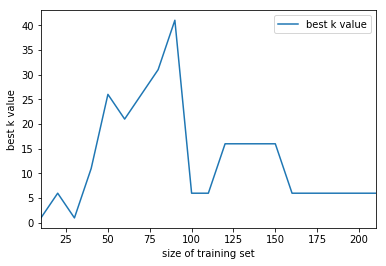

In [10]:
n = list(range(10, 211, 10))
minTestError = math.inf
num_k = 1
best_k_test = num_k

#dataSets = [(n values, best k values)]
dataSets=[]

for value in n:
    num_trainNo = int(value/3)
    num_trainAb = value-num_trainNo

    x_train_subset = pd.concat([x_train.loc[:num_trainAb-1,:], x_train.loc[210:(209+num_trainNo),:]])
    y_train_subset = pd.concat([y_train.loc[:num_trainAb-1,], y_train.loc[210:(209+num_trainNo),]])

    while(num_k <=196 and num_k <= value):
        # create object of the classifier
        knn = KNeighborsClassifier(n_neighbors=num_k)
        #train the algorithm
        knn.fit(x_train_subset, y_train_subset)
        #predict the response
        pred_subset_test = knn.predict(x_test)
        #compute test error
        test_error = np.mean(y_test != pred_subset_test)
        
        if minTestError > test_error:
            minTestError = test_error
            best_k_test = num_k
        
        num_k = num_k + 5
    dataSets.append((value, best_k_test, minTestError))
    num_k = 1
    minTestError = math.inf

dataSetsDf = pd.DataFrame(dataSets, columns=['n value', 'best k value', 'best test error'])
#print(dataSetsDf)

#plot
line = dataSetsDf.plot.line(x='n value', y='best test error')
plt.ylabel('best test error')
plt.xlabel('n value')
plt.title('learning curve')
plt.show()

lines = dataSetsDf.plot.line(x='n value', y='best k value')
plt.ylabel('best k value')
plt.xlabel('size of training set')
plt.show()

## (d)-i.A. Minkowski Distance with p=1. select the best k.

In [11]:
num_k = list(range(1, 197, 5))
bM_test_k = num_k[0]
minTestError = math.inf
#minTrainError = math.inf
#manhattanDataSets = [(k value, test error)]
manhattanDataSets = []

for value in num_k:
    # create object of the classifier
    neigh = KNeighborsClassifier(n_neighbors=value, p=1)
    #train the algorithm
    neigh.fit(x_train, y_train)
    #predict the response
    pred_test = neigh.predict(x_test)
    pred_train = neigh.predict(x_train)
    test_error = np.mean(y_test != pred_test)
    train_error = np.mean(y_train != pred_train)
    
    if minTestError > test_error:
        minTestError = test_error
        bM_test_k = value
        
    manhattanDataSets.append((value, test_error, train_error))

manhattanDataSetsDf = pd.DataFrame(manhattanDataSets, columns=['k value', 'test error', 'train error'])

print("best test k : ", bM_test_k)
print(manhattanDataSetsDf)


best test k :  6
    k value  test error  train error
0         1        0.12     0.000000
1         6        0.11     0.138095
2        11        0.11     0.142857
3        16        0.12     0.133333
4        21        0.12     0.147619
5        26        0.11     0.166667
6        31        0.12     0.166667
7        36        0.13     0.161905
8        41        0.13     0.166667
9        46        0.13     0.171429
10       51        0.14     0.171429
11       56        0.13     0.185714
12       61        0.15     0.176190
13       66        0.15     0.180952
14       71        0.14     0.176190
15       76        0.14     0.180952
16       81        0.16     0.166667
17       86        0.15     0.152381
18       91        0.20     0.180952
19       96        0.20     0.176190
20      101        0.22     0.200000
21      106        0.21     0.204762
22      111        0.23     0.219048
23      116        0.21     0.228571
24      121        0.22     0.242857
25      126        0.

In [12]:
#manhattanLine = manhattanDataSetsDf.plot.line(x='k value', y='test error')

## (d)-i.B. log10(p) ->{0.1, 0.2, ...., 1}. What is the best log10(p)?

In [13]:
bestLogP = math.inf
minTestError = math.inf
#minkowskiPDataSets = [(p value, test error, train error)]
minkowskiPDataSets = []

# Generate p_values
log10p = np.arange(0.1, 1.1, 0.1)
p_values = [math.pow(10,x) for x in log10p]

for idx, p in enumerate(p_values) :
    # create object of the classifier
    neigh = KNeighborsClassifier(n_neighbors=bM_test_k, p=p)
    #train the algorithm
    neigh.fit(x_train, y_train)
    #predict the response
    pred_test = neigh.predict(x_test)
    pred_train = neigh.predict(x_train)
    test_error = np.mean(y_test != pred_test)
    train_error = np.mean(y_train != pred_train)
    minkowskiPDataSets.append((p, test_error, train_error))
    
    if minTestError > test_error:
        minTestError = test_error
        bestLogP = log10p[idx]
        
minkowskiPDataSetsDf = pd.DataFrame(minkowskiPDataSets, columns = ['p value', 'test error', 'train error'])
minkowskiPDataSetsDf.insert(loc=1, column='log10(P)', value=log10p)

print("bestLogP : ", bestLogP)
print(minkowskiPDataSetsDf)

bestLogP :  0.6
     p value  log10(P)  test error  train error
0   1.258925       0.1        0.09     0.138095
1   1.584893       0.2        0.09     0.147619
2   1.995262       0.3        0.08     0.152381
3   2.511886       0.4        0.08     0.152381
4   3.162278       0.5        0.08     0.147619
5   3.981072       0.6        0.06     0.152381
6   5.011872       0.7        0.07     0.152381
7   6.309573       0.8        0.08     0.147619
8   7.943282       0.9        0.09     0.147619
9  10.000000       1.0        0.09     0.133333


## (d)-i.C. Chebyshev Distance with p->inf

In [14]:
num_k = list(range(1, 197, 5))
bc_test_k = num_k[0]
#best_train_k = num_k
minTestError = math.inf
#minTrainError = math.inf
#ChebyshevDataSets = [((k value, test error, train error))]
ChebyshevDataSets = []

for value in num_k:
    # create object of the classifier
    neigh = KNeighborsClassifier(n_neighbors=value, p=math.inf, metric='chebyshev')
    #train the algorithm
    neigh.fit(x_train, y_train)
    #predict the response
    pred_test = neigh.predict(x_test)
    pred_train = neigh.predict(x_train)
    test_error = np.mean(y_test != pred_test)
    train_error = np.mean(y_train != pred_train)
    
    if minTestError > test_error:
        minTestError = test_error
        bc_test_k = value
        
    ChebyshevDataSets.append((value, test_error, train_error))
        

ChebyshevDataSetsDf = pd.DataFrame(ChebyshevDataSets, columns = ['k value', 'test error', 'train error'])
print("best test k : ", bc_test_k)
print(ChebyshevDataSetsDf)

best test k :  16
    k value  test error  train error
0         1        0.13     0.000000
1         6        0.09     0.152381
2        11        0.12     0.152381
3        16        0.08     0.147619
4        21        0.11     0.133333
5        26        0.12     0.157143
6        31        0.12     0.142857
7        36        0.10     0.152381
8        41        0.13     0.142857
9        46        0.12     0.161905
10       51        0.12     0.166667
11       56        0.12     0.166667
12       61        0.14     0.171429
13       66        0.13     0.161905
14       71        0.14     0.180952
15       76        0.11     0.176190
16       81        0.14     0.171429
17       86        0.12     0.171429
18       91        0.15     0.157143
19       96        0.14     0.166667
20      101        0.19     0.171429
21      106        0.18     0.171429
22      111        0.18     0.180952
23      116        0.18     0.176190
24      121        0.21     0.209524
25      126        0

## (d)-ii. Mahalanobis Distance

In [15]:
num_k = list(range(1, 197, 5))
bMh_test_k = num_k[0]
minTestError = math.inf
#MahalanobisDataSets = [(k value, test error, train error)]
MahalanobisDataSets = []


for value in num_k:
    # create object of the classifier
    neigh = KNeighborsClassifier(n_neighbors=value, algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': np.cov(x_train)})
    #train the algorithm
    neigh.fit(x_train, y_train)
    #predict the response
    pred_test = neigh.predict(x_test)
    pred_train = neigh.predict(x_train)
    test_error = np.mean(y_test != pred_test)
    train_error = np.mean(y_train != pred_train)
    
    if minTestError > test_error:
        minTestError = test_error
        bMh_test_k = value
    
    MahalanobisDataSets.append((value, test_error, train_error))
        

MahalanobisDataSetsDf = pd.DataFrame(MahalanobisDataSets, columns = ['k value', 'test error', 'train error'])
print("best test k : ", bMh_test_k)
print(MahalanobisDataSetsDf)

best test k :  6
    k value  test error  train error
0         1        0.18     0.000000
1         6        0.16     0.119048
2        11        0.19     0.185714
3        16        0.20     0.176190
4        21        0.23     0.176190
5        26        0.21     0.185714
6        31        0.21     0.180952
7        36        0.23     0.180952
8        41        0.23     0.185714
9        46        0.24     0.185714
10       51        0.25     0.190476
11       56        0.26     0.190476
12       61        0.26     0.204762
13       66        0.26     0.195238
14       71        0.27     0.219048
15       76        0.27     0.214286
16       81        0.25     0.238095
17       86        0.27     0.233333
18       91        0.28     0.252381
19       96        0.26     0.242857
20      101        0.28     0.285714
21      106        0.29     0.300000
22      111        0.29     0.295238
23      116        0.29     0.323810
24      121        0.30     0.328571
25      126        0.

## (e) Use weighted voting with Euclidean, Manhattan, and Chevyshev distance and report the best test errors when k=>{1,6,11,16,...,196}

In [16]:
def computeBestErrorsKNN(pValue, wayOfVoting, metricName):
    num_k = list(range(1, 197, 5))
    btest_k = num_k
    btrain_k = num_k
    minTestError = math.inf
    minTrainError = math.inf
    #weightedDataSets = [(k_values, best test error, best train errors)]
    weightedDataSets = []

    for value in num_k:
        ## create object of the classifier
        neigh = KNeighborsClassifier(n_neighbors=value, weights = wayOfVoting ,p=pValue, metric=metricName)
        ## train the algorithm
        neigh.fit(x_train, y_train)
        ## predict the response
        pred_test = neigh.predict(x_test)
        pred_train = neigh.predict(x_train)
        test_error = np.mean(y_test != pred_test)
        train_error = np.mean(y_train != pred_train)

        if minTestError > test_error:
            minTestError = test_error
            btest_k = value

        if minTrainError > train_error:
            minTrainError = train_error
            btrain_k = value
        
        weightedDataSets.append((value, minTestError, minTrainError))
        
    return weightedDataSets, btest_k, minTestError
    

### Euclidean with weighted

In [17]:
euclideanWeightedDataSets, euclidean_best_k, euclidean_best_test_error = computeBestErrorsKNN(2, 'distance', 'minkowski')
euclidean_weightDf = pd.DataFrame(euclideanWeightedDataSets, columns = ['k values', 'best test error', 'best train error'])
#print(euclidean_weightDf)
print("best k value: ", euclidean_best_k)
print('best test error : ', euclidean_best_test_error)




best k value:  6
best test error :  0.1


### Manhattan with weighted

In [18]:
manhattanWeightedDataSets, manhattan_best_k, manhattan_best_test_error = computeBestErrorsKNN(1, 'distance', 'minkowski')
manhattan_weightDf = pd.DataFrame(manhattanWeightedDataSets, columns = ['k values', 'best test error', 'best train error'])
#print(manhattan_weightDf)
print("best k value: ", manhattan_best_k)
print('best test error : ', manhattan_best_test_error)


best k value:  26
best test error :  0.1


### Chebyshev with weighted

In [19]:
chebyshevWeightedDataSets, chebyshev_best_k, chebyshev_best_test_error = computeBestErrorsKNN(math.inf, 'distance', 'chebyshev')
chebyshev_weightDf = pd.DataFrame(chebyshevWeightedDataSets, columns = ['k values', 'best test error', 'best train error'])
#print(chebyshev_weightDf)
print("best k value: ", chebyshev_best_k)
print('best test error : ', chebyshev_best_test_error)


best k value:  16
best test error :  0.11


## (f) lowest training error rate in this homework?
###     Answer :  0.0